<a href="https://colab.research.google.com/github/PerdikosFilippos/Face-Mask-Detection-using-a-Convolutional-Neural-Network-CNN-/blob/main/Face_Mask_Detection_using_a_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install kaggle

In [33]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Importing Face Mask Dataset

In [34]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [35]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [36]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


#Importing the Dependencies

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [38]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2497.jpg', 'with_mask_783.jpg', 'with_mask_1045.jpg', 'with_mask_2933.jpg', 'with_mask_2275.jpg']
['with_mask_2192.jpg', 'with_mask_239.jpg', 'with_mask_1537.jpg', 'with_mask_2407.jpg', 'with_mask_674.jpg']


In [39]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2713.jpg', 'without_mask_1019.jpg', 'without_mask_2406.jpg', 'without_mask_3036.jpg', 'without_mask_3680.jpg']
['without_mask_3744.jpg', 'without_mask_100.jpg', 'without_mask_860.jpg', 'without_mask_2967.jpg', 'without_mask_2110.jpg']


In [40]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


#Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [41]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [42]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [43]:
#Combine these two sets

labels = with_mask_labels + without_mask_labels

print(len(labels))

print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#Displaying the Images

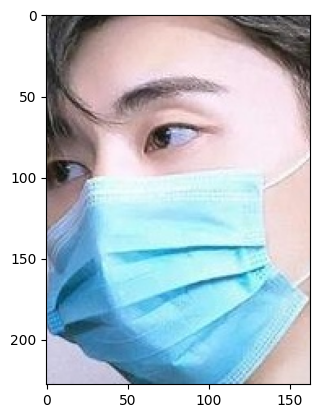

In [44]:
#Display one with mask and one without
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

#Image Processing

1. Resize images
2. Convert images to numpy arrays

In [48]:
data = []



with_mask_path = '/content/data/with_mask/'

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))    #Resizing
  image = image.convert('RGB')
  image = np.array(image)   #Converting images to numpy arrays
  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))    #Resizing
  image = image.convert('RGB')
  image = np.array(image)   #Converting images to numpy arrays
  data.append(image)

In [49]:
type(data)

list

In [50]:
len(data)

7553

In [52]:
type(data[0])

numpy.ndarray

In [53]:
data[0].shape

(128, 128, 3)

In [54]:
#Convert image list and label into numpy arrays

X = np.array(data)
Y = np.array(labels)

In [61]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [63]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


#Split data

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [68]:
#SCALING THE DATA

X_train_scaled = X_train/255

X_test_scaled = X_test/255

#Building a CNN

In [70]:
import tensorflow as tf
from tensorflow import keras

In [81]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [82]:
#Compile the CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [83]:
#Training the CNN
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 5s 23ms/step - loss: 0.4988 - acc: 0.7894 - val_loss: 0.2587 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2806 - acc: 0.8891 - val_loss: 0.2331 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2389 - acc: 0.9068 - val_loss: 0.2767 - val_acc: 0.9107
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1874 - acc: 0.9244 - val_loss: 0.2177 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1616 - acc: 0.9358 - val_loss: 0.2069 - val_acc: 0.9273


#Model Evaluation

In [85]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy: ', accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.1905 - acc: 0.9292
Test Accuracy:  0.9291859865188599


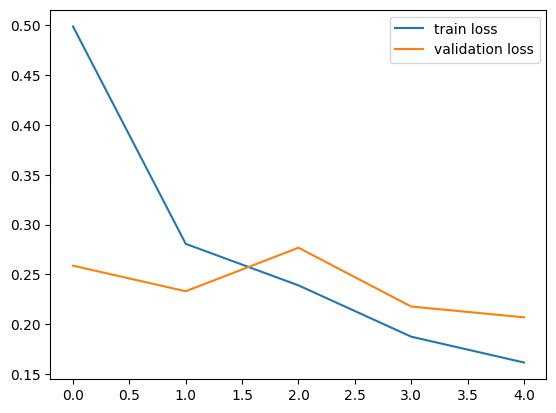

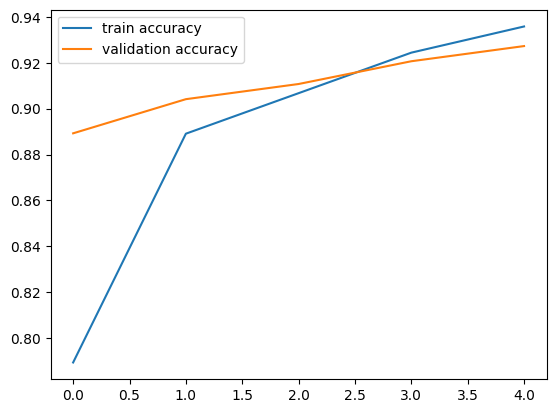

In [89]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()


#BUILDING THE PREDICTIVE SYSTEM

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')ß